In [1]:
import pandas as pd
import numpy as np
import vertica_python
import os
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
username = os.getenv('VERTICA_USERNAME')
password = os.getenv('VERTICA_PASSWORD')
conn_info = {'host': 'warehouse.analytics.edx.org',
             'port': 5433,
             'user': username,
             'password': password,
             'database': 'warehouse',
             'read_timeout': 600,
             'unicode_error': 'strict',
             'ssl': False}

In [4]:
query = """

SELECT
*,
    CASE 
    WHEN course_program_number::int < 5 THEN 'Unit 1'
    WHEN course_program_number::int < 8 THEN 'Unit 2'
    WHEN course_program_number::int < 11 THEN 'Unit 3'
    ELSE NULL
    END AS ms_course_program_group
    FROM
(
SELECT
	DISTINCT CASE WHEN a.course_id IN (
'course-v1:Microsoft+DAT101x+1T2017',
'course-v1:Microsoft+DAT101x+2T2017',
'course-v1:Microsoft+DAT102x+1T2017',
'course-v1:Microsoft+DAT102x+2T2017',
'course-v1:Microsoft+DAT201x+1T2017',
'course-v1:Microsoft+DAT201x+2T2017',
'course-v1:Microsoft+DAT202.3x+1T2017',
'course-v1:Microsoft+DAT202.3x+2T2017',
'course-v1:Microsoft+DAT203.1x+1T2017',
'course-v1:Microsoft+DAT203.1x+2T2017',
'course-v1:Microsoft+DAT203.2x+1T2017',
'course-v1:Microsoft+DAT203.2x+2T2017',
'course-v1:Microsoft+DAT203.3x+1T2017',
'course-v1:Microsoft+DAT203.3x+2T2017',
'course-v1:Microsoft+DAT204x+1T2017',
'course-v1:Microsoft+DAT204x+2T2017',
'course-v1:Microsoft+DAT206x+1T2017',
'course-v1:Microsoft+DAT206x+2T2017',
'course-v1:Microsoft+DAT207x+1T2017',
'course-v1:Microsoft+DAT207x+2T2017',
'course-v1:Microsoft+DAT208x+1T2017',
'course-v1:Microsoft+DAT208x+2T2017',
'course-v1:Microsoft+DAT209x+1T2017',
'course-v1:Microsoft+DAT209x+2T2017',
'course-v1:Microsoft+DAT210x+1T2017',
'course-v1:Microsoft+DAT210x+2T2017',
'course-v1:Microsoft+DAT211x+1T2017',
'course-v1:Microsoft+DAT211x+2T2017',
'course-v1:Microsoft+DAT222x+1T2017',
'course-v1:Microsoft+DAT222x+3T2017'

	) THEN 'program' ELSE 'non_program' END AS fake_program,
CASE
WHEN a.course_id = 'course-v1:Microsoft+DAT101x+2T2017' THEN  '1'	
WHEN a.course_id = 'course-v1:Microsoft+DAT201x+2T2017' THEN  '2'	
WHEN a.course_id = 'course-v1:Microsoft+DAT206x+2T2017' THEN  '3'	
WHEN a.course_id = 'course-v1:Microsoft+DAT207x+2T2017' THEN  '3'	
WHEN a.course_id = 'course-v1:Microsoft+DAT222x+3T2017' THEN  '4'
WHEN a.course_id = 'course-v1:Microsoft+DAT204x+2T2017' THEN  '5'	
WHEN a.course_id = 'course-v1:Microsoft+DAT208x+2T2017' THEN  '5'	
WHEN a.course_id = 'course-v1:Microsoft+DAT203.1x+2T2017' THEN  '6'	
WHEN a.course_id = 'course-v1:Microsoft+DAT203.2x+2T2017' THEN  '7'	
WHEN a.course_id = 'course-v1:Microsoft+DAT209x+2T2017' THEN  '8'	
WHEN a.course_id = 'course-v1:Microsoft+DAT210x+2T2017' THEN  '8'	
WHEN a.course_id = 'course-v1:Microsoft+DAT203.3x+2T2017' THEN  '9'	
WHEN a.course_id = 'course-v1:Microsoft+DAT211x+2T2017' THEN  '9'	
WHEN a.course_id = 'course-v1:Microsoft+DAT202.3x+2T2017' THEN  '9'	
WHEN a.course_id = 'course-v1:Microsoft+DAT213x+3T2017' THEN  '9'	
WHEN a.course_id = 'course-v1:Microsoft+DAT102x+1T2017' THEN  '10'	
WHEN a.course_id = 'course-v1:Microsoft+DAT102x+2T2017'  THEN '10'
WHEN a.course_id = 'course-v1:Microsoft+DAT101x+1T2017' THEN  '1'	
WHEN a.course_id = 'course-v1:Microsoft+DAT201x+1T2017' THEN  '2'	
WHEN a.course_id = 'course-v1:Microsoft+DAT206x+1T2017' THEN  '3'	
WHEN a.course_id = 'course-v1:Microsoft+DAT207x+1T2017' THEN  '3'	
WHEN a.course_id = 'course-v1:Microsoft+DAT222x+1T2017' THEN  '4'
WHEN a.course_id = 'course-v1:Microsoft+DAT204x+1T2017' THEN  '5'	
WHEN a.course_id = 'course-v1:Microsoft+DAT208x+1T2017' THEN  '5'	
WHEN a.course_id = 'course-v1:Microsoft+DAT203.1x+1T2017' THEN  '6'	
WHEN a.course_id = 'course-v1:Microsoft+DAT203.2x+1T2017' THEN  '7'	
WHEN a.course_id = 'course-v1:Microsoft+DAT209x+1T2017' THEN  '8'	
WHEN a.course_id = 'course-v1:Microsoft+DAT210x+1T2017' THEN  '8'	
WHEN a.course_id = 'course-v1:Microsoft+DAT203.3x+1T2017' THEN  '9'	
WHEN a.course_id = 'course-v1:Microsoft+DAT211x+1T2017' THEN  '9'	
WHEN a.course_id = 'course-v1:Microsoft+DAT202.3x+1T2017' THEN  '9'	
WHEN a.course_id = 'course-v1:Microsoft+DAT213x+3T2017' THEN  '9'	
WHEN a.course_id = 'course-v1:Microsoft+DAT102x+1T2017' THEN  '10'	
WHEN a.course_id = 'course-v1:Microsoft+DAT102x+1T2017'  THEN '10'
ELSE NULL
END AS course_program_number,

	a.course_id,
	b.course_start_date,
	b.course_end_date,
	a.sum_enrolls,
	a.sum_enrolls_vtr,
	a.sum_verifications,
	COALESCE(d.cnt_discounted_verifications, 0) AS cnt_discounted_verifications,
	a.vtr * 100.0 AS vtr,
	((a.sum_verifications - COALESCE(d.cnt_discounted_verifications, 0))*100.0/(a.sum_enrolls_vtr - COALESCE(d.cnt_discounted_verifications, 0))) AS undiscounted_vtr,
	a.sum_bookings,
	b.course_number,
	b.course_seat_price,
	b.level_type,
    a.vtr * b.course_seat_price AS expected_value,
	CASE WHEN course_seat_price <= 50 THEN 'lower' else 'higher' END AS course_seat_price_group
FROM 
	business_intelligence.course_stats_summary a
JOIN 
	business_intelligence.course_master b
ON 
	a.course_id = b.course_id
JOIN
(
	SELECT
		course_number,
		COUNT(DISTINCT CASE WHEN course_seat_price <= 50 THEN 'lower' else 'higher' END) AS cnt_unique_price,
		COUNT(1) AS cnt_courses
	FROM 
		business_intelligence.course_stats_summary a
	JOIN 
		business_intelligence.course_master b
	ON 
		a.course_id = b.course_id
	AND 
		b.course_partner = 'Microsoft'
	AND 
		a.sum_enrolls > 200
	AND 
		b.course_end_date <= CURRENT_DATE()
	AND 
		b.course_start_date >= '2017-01-01'
	GROUP BY 
		1
	HAVING 
		COUNT(DISTINCT CASE WHEN course_seat_price <= 50 THEN 'lower' else 'higher' END) > 1
) c
ON 
	b.course_number = c.course_number
AND 
	a.sum_enrolls > 200
AND 
	b.course_end_date <= CURRENT_DATE()
AND 
	b.course_start_date >= '2017-01-01'
LEFT JOIN
(
	SELECT
		course_id,
		COUNT(1) as cnt_discounted_verifications
	FROM 
		business_intelligence.voucher_redemption
	WHERE 
		voucher_code = 'MPP50'
	GROUP BY 
		course_id
) d
ON
	a.course_id = d.course_id
) a

"""

In [5]:
connection = vertica_python.connect(**conn_info)

cur = connection.cursor('dict')

cur.execute(query)
extract = cur.fetchall()
df = pd.DataFrame(extract)

connection.close()

In [6]:
df.head()

,fake_program,course_program_number,course_id,course_start_date,course_end_date,sum_enrolls,sum_enrolls_vtr,sum_verifications,cnt_discounted_verifications,vtr,undiscounted_vtr,sum_bookings,course_number,course_seat_price,level_type,expected_value,course_seat_price_group,ms_course_program_group
0,non_program,None,course-v1:Microsoft+DAT223.1x+2T2017,2017-04-01,2017-06-30,1137,1137,35,0,3.0782761653474055000,3.0782761653474054529,3326.40,Microsoft+DAT223.1x,99.0,Advanced,3.047493,higher,None
1,non_program,None,course-v1:Microsoft+DAT217x+1T2017,2017-01-01,2017-03-31,3144,3141,102,0,3.2473734479465138000,3.2473734479465138491,4667.45,Microsoft+DAT217x,49.0,Intermediate,1.591213,lower,None
2,program,7,course-v1:Microsoft+DAT203.2x+2T2017,2017-04-01,2017-06-30,10797,10797,856,377,7.9281281837547467000,4.5969289827255278311,53441.05,Microsoft+DAT203.2x,99.0,Intermediate,7.848847,higher,Unit 2
3,program,2,course-v1:Microsoft+DAT201x+1T2017,2017-01-01,2017-03-31,19176,19175,2986,0,15.5723598435462842000,15.5723598435462842243,136975.55,Microsoft+DAT201x,49.0,Intermediate,7.630456,lower,Unit 1
4,program,9,course-v1:Microsoft+DAT203.3x+1T2017,2017-01-01,2017-03-31,8648,8647,418,0,4.8340464901121776000,4.8340464901121776339,18207.15,Microsoft+DAT203.3x,49.0,Advanced,2.368683,lower,Unit 3


In [7]:
df['course_seat_price'] = df.course_seat_price.astype(str)
df['course_program_number'] = df.course_program_number.astype(str)
df['course_seat_price'] = df.course_seat_price.astype(str)
df['vtr'] = df.vtr.astype(float)
df['undiscounted_vtr'] = df.undiscounted_vtr.astype(float)
df['sum_bookings'] = df.sum_bookings.astype(float)

In [8]:
df.to_csv('../Downloads/MS_Price_Sensitivity.csv')

In [9]:
sns.set_style("darkgrid")
sns.set_context("poster", font_scale=1, rc={"lines.linewidth": 2})

In [ ]:
def plot_stuff(df, x, y, row = None, hue = None):
    
    if (x == 'course_seat_price_group'):
        order_list = ['lower', 'higher']
        hue_order_list = ['Introductory', 'Intermediate', 'Advanced']
    else:
        order_list = ['Introductory', 'Intermediate', 'Advanced']
        hue_order_list = ['lower', 'higher']
        
    if (row == None):
        
        print ('\n\n\n\n%s' % ('*' * 100))
        sns.factorplot(
            data = df,
            x = x,
            y = y,
            kind = 'bar',
            size = 6,
            row = row,
            #col_wrap = 3,
            order = order_list,
            hue_order = hue_order_list,
            sharey = False,
            hue = hue
        )
        sns.plt.show()
        
    else:
        
        print ('\n\n\n\n%s' % ('*' * 100))
        sns.factorplot(
            data = df,
            x = x,
            y = y,
            kind = 'bar',
            size = 6,
            col = row,
            col_wrap = 3,
            order = order_list,
            hue_order = hue_order_list,
            sharey = False,
            hue = hue
        )
        sns.plt.show()

## Comparing Distributions

In [22]:
df.groupby('course_seat_price_group').sum()

,sum_enrolls,sum_enrolls_vtr,sum_verifications,cnt_discounted_verifications,vtr,undiscounted_vtr,sum_bookings,expected_value
course_seat_price_group,,,,,,,,
higher,251332,251298,13324,3496,111.869560,88.233035,954870.95,110.750865
lower,341919,341879,20505,3,147.584232,147.506317,817146.97,68.705805






****************************************************************************************************


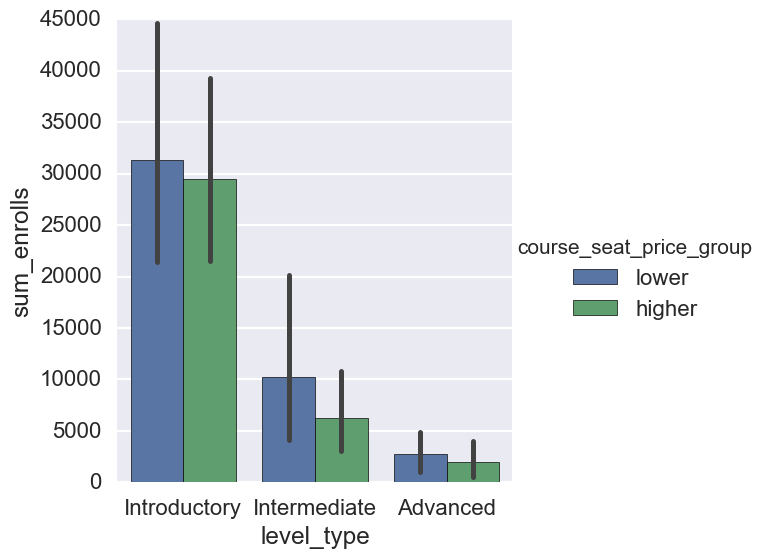





****************************************************************************************************


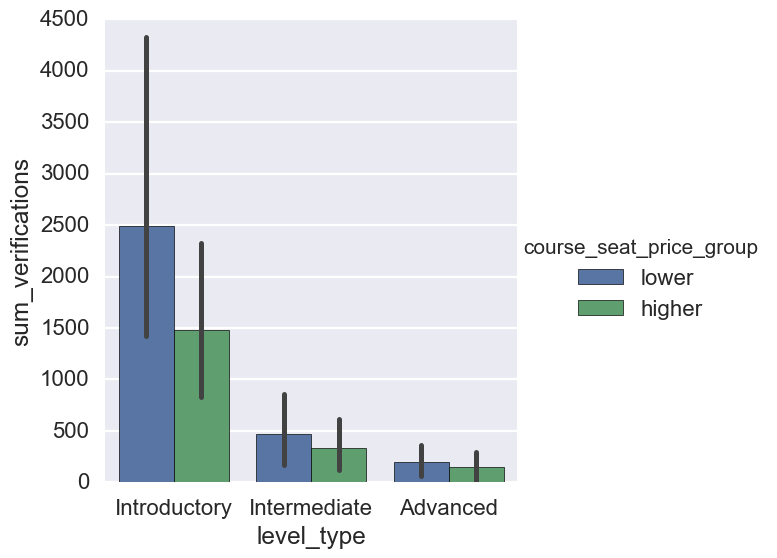





****************************************************************************************************


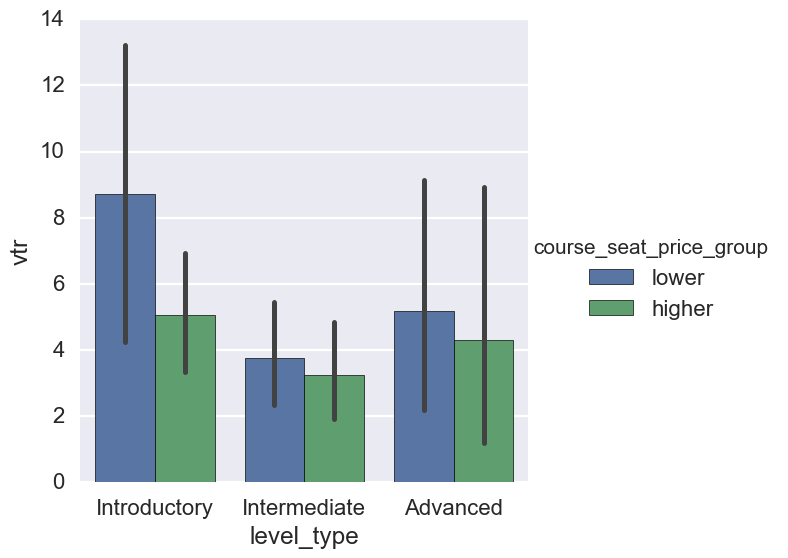





****************************************************************************************************


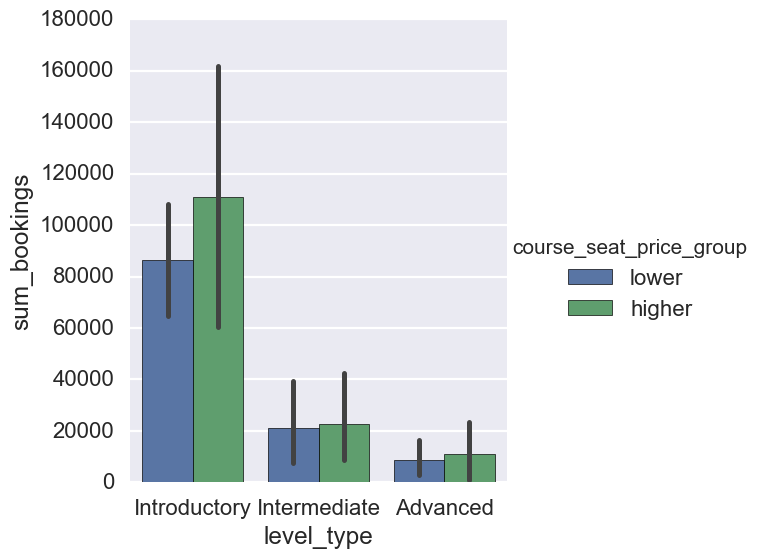

In [23]:
plot_stuff(df, hue = 'course_seat_price_group', x = 'level_type', y = 'sum_enrolls')
plot_stuff(df, hue = 'course_seat_price_group', x = 'level_type', y = 'sum_verifications')
plot_stuff(df, hue = 'course_seat_price_group', x = 'level_type', y = 'vtr')
plot_stuff(df, hue = 'course_seat_price_group', x = 'level_type', y = 'sum_bookings')

## Comparing Aggregated Performance





****************************************************************************************************


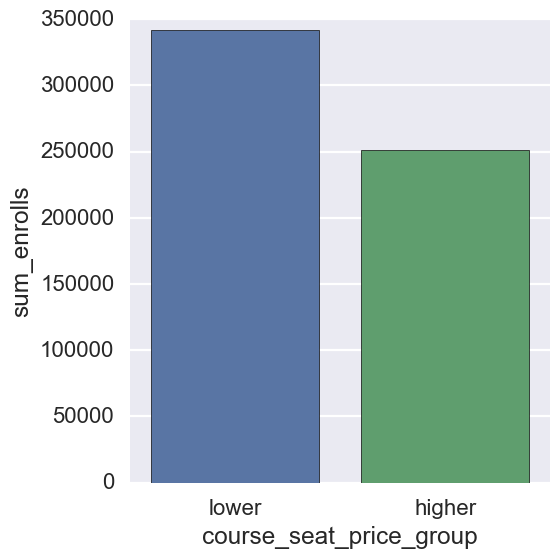





****************************************************************************************************


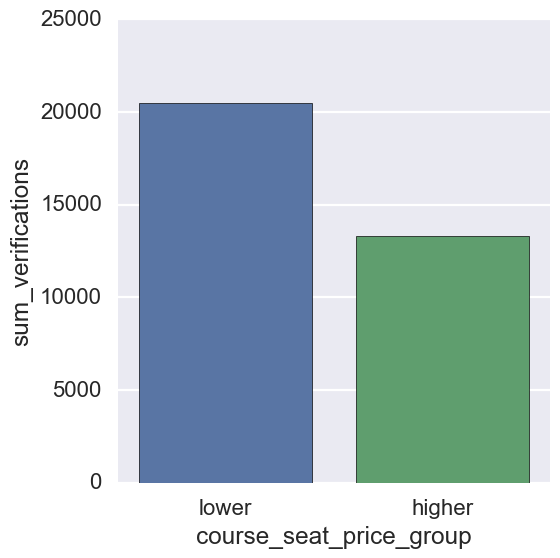





****************************************************************************************************


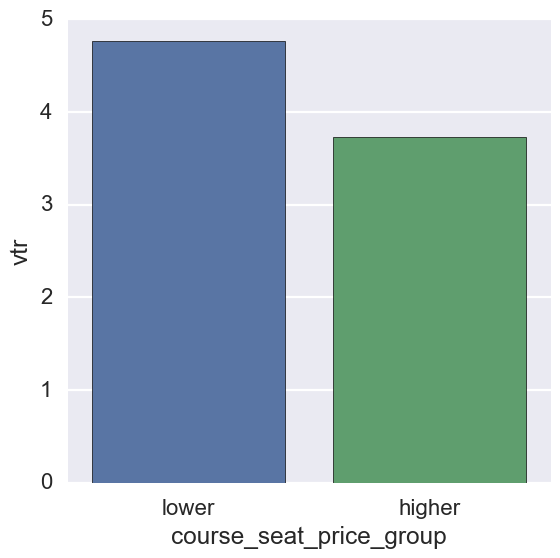





****************************************************************************************************


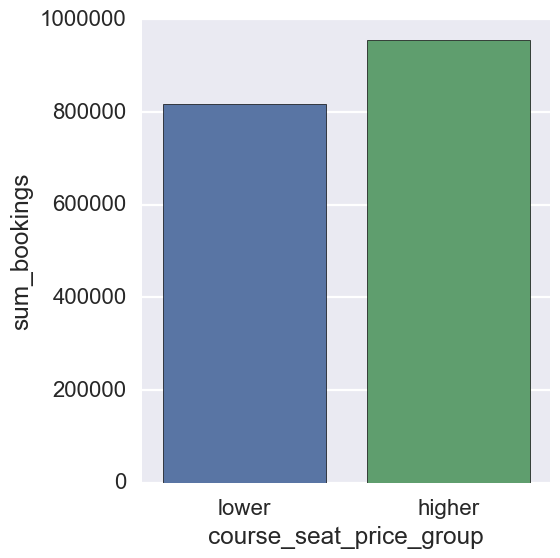

In [24]:
plot_stuff(df.groupby('course_seat_price_group').sum().reset_index(), x = 'course_seat_price_group', y = 'sum_enrolls')
plot_stuff(df.groupby('course_seat_price_group').sum().reset_index(), x = 'course_seat_price_group', y = 'sum_verifications')
plot_stuff(df.groupby('course_seat_price_group').mean().reset_index(), x = 'course_seat_price_group', y = 'vtr')
plot_stuff(df.groupby('course_seat_price_group').sum().reset_index(), x = 'course_seat_price_group', y = 'sum_bookings')





****************************************************************************************************


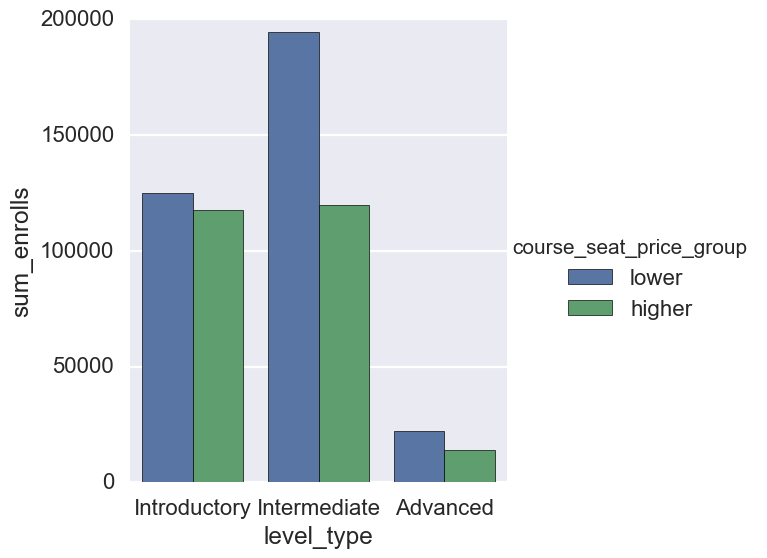





****************************************************************************************************


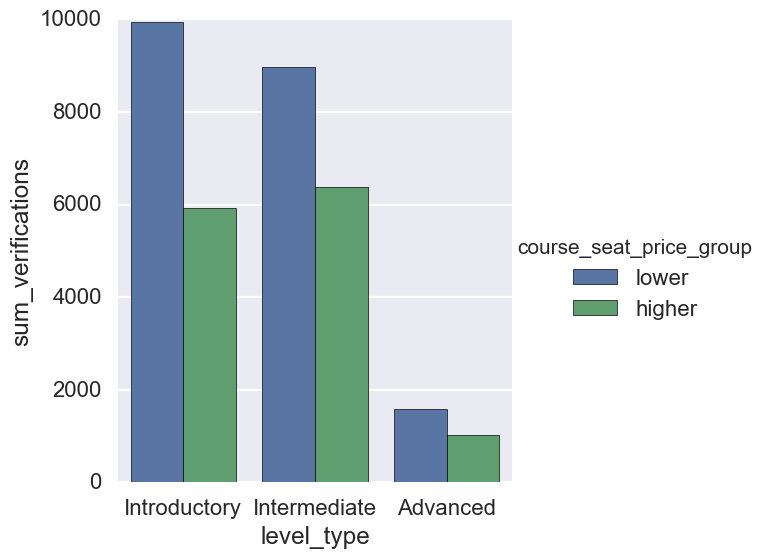





****************************************************************************************************


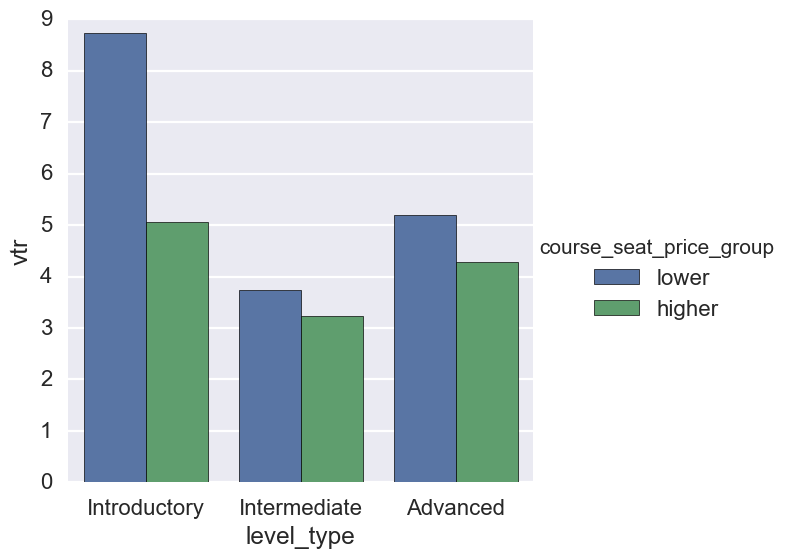





****************************************************************************************************


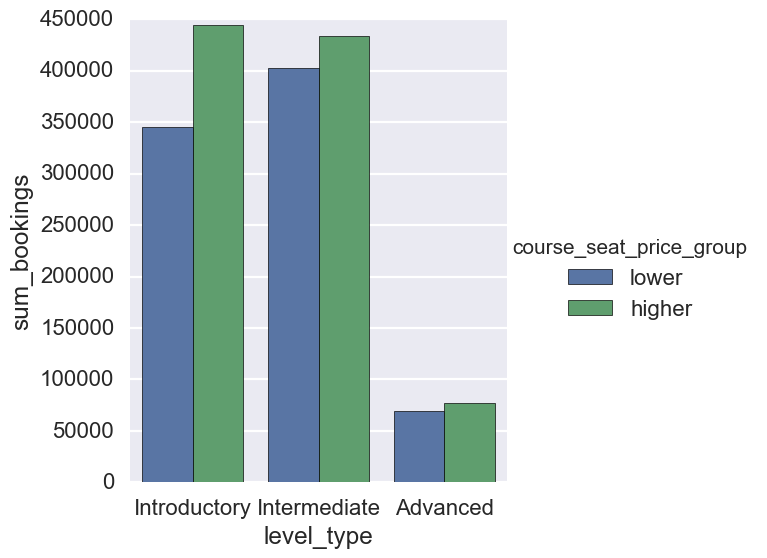

In [25]:
plot_stuff(df.groupby(['level_type','course_seat_price_group']).sum().reset_index(), x = 'level_type', hue = 'course_seat_price_group', y = 'sum_enrolls')
plot_stuff(df.groupby(['level_type','course_seat_price_group']).sum().reset_index(), x = 'level_type', hue = 'course_seat_price_group', y = 'sum_verifications')
plot_stuff(df.groupby(['level_type','course_seat_price_group']).mean().reset_index(), x = 'level_type', hue = 'course_seat_price_group', y = 'vtr')
plot_stuff(df.groupby(['level_type','course_seat_price_group']).sum().reset_index(), x = 'level_type', hue = 'course_seat_price_group', y = 'sum_bookings')

## Comparing course to course





****************************************************************************************************


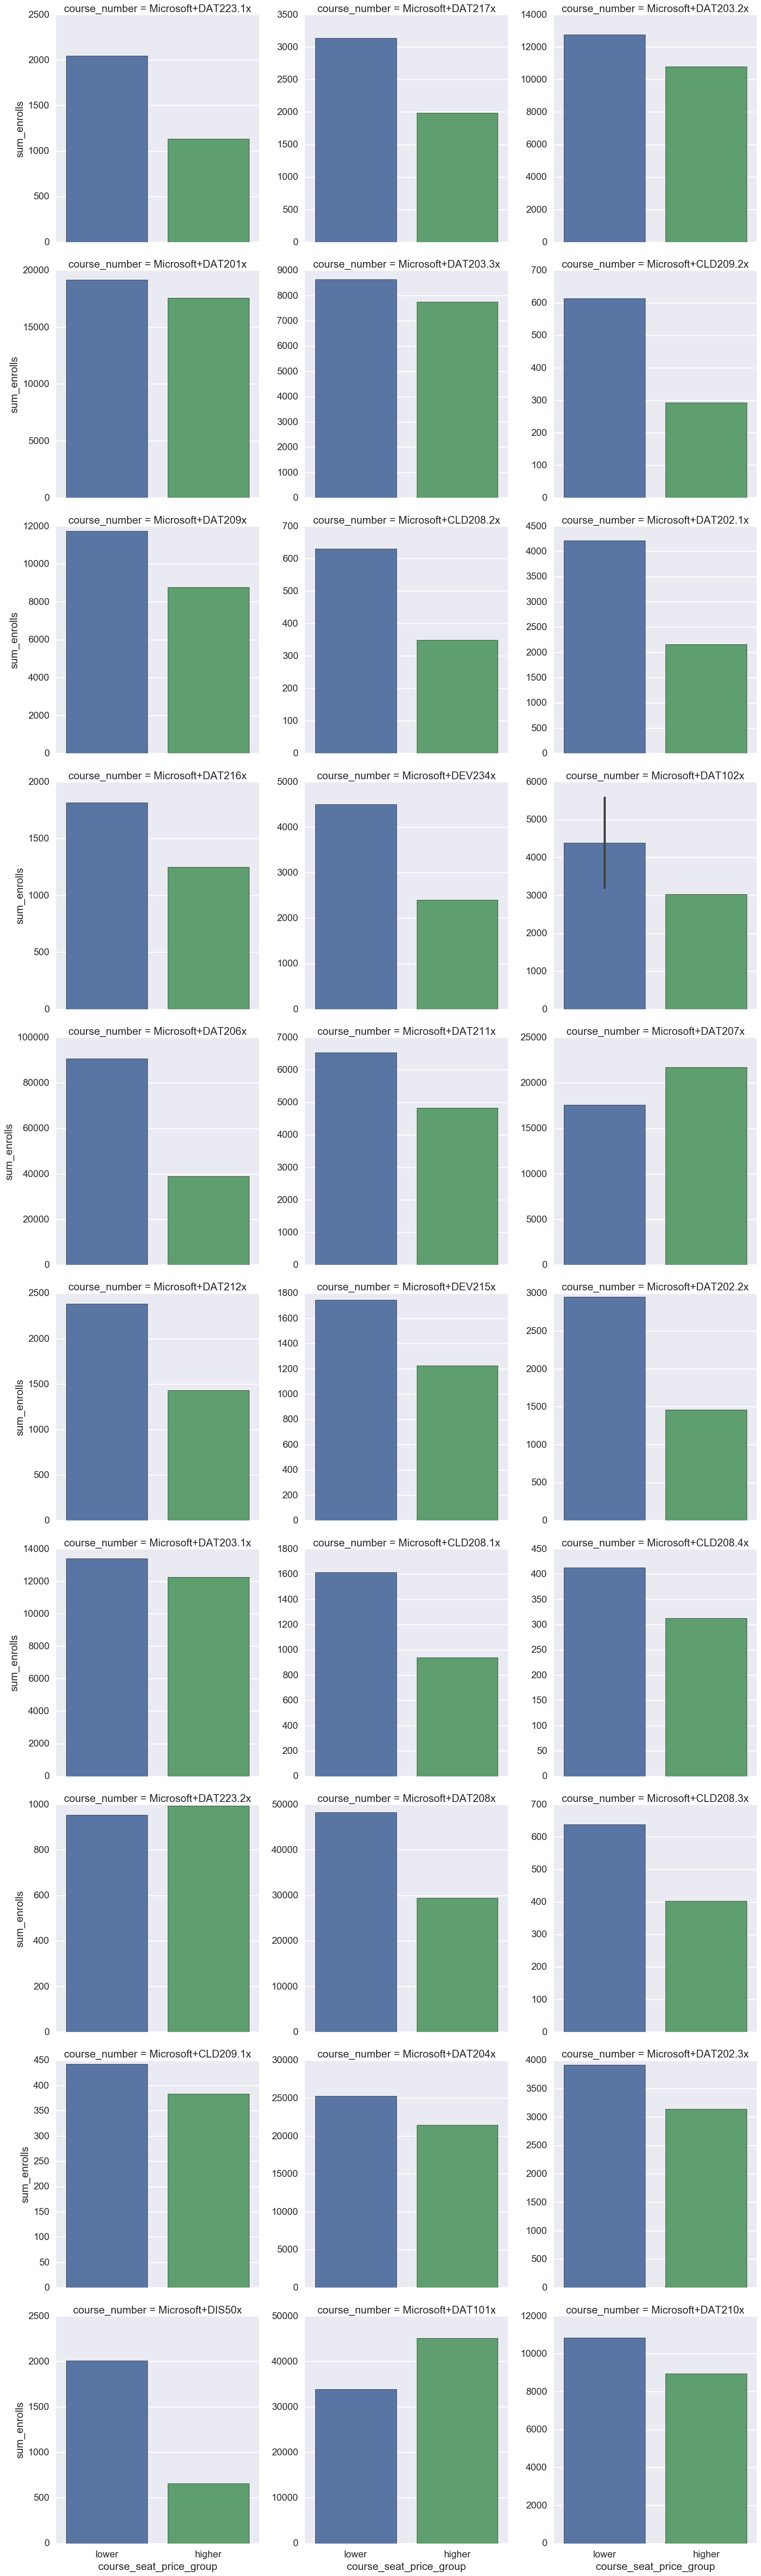





****************************************************************************************************


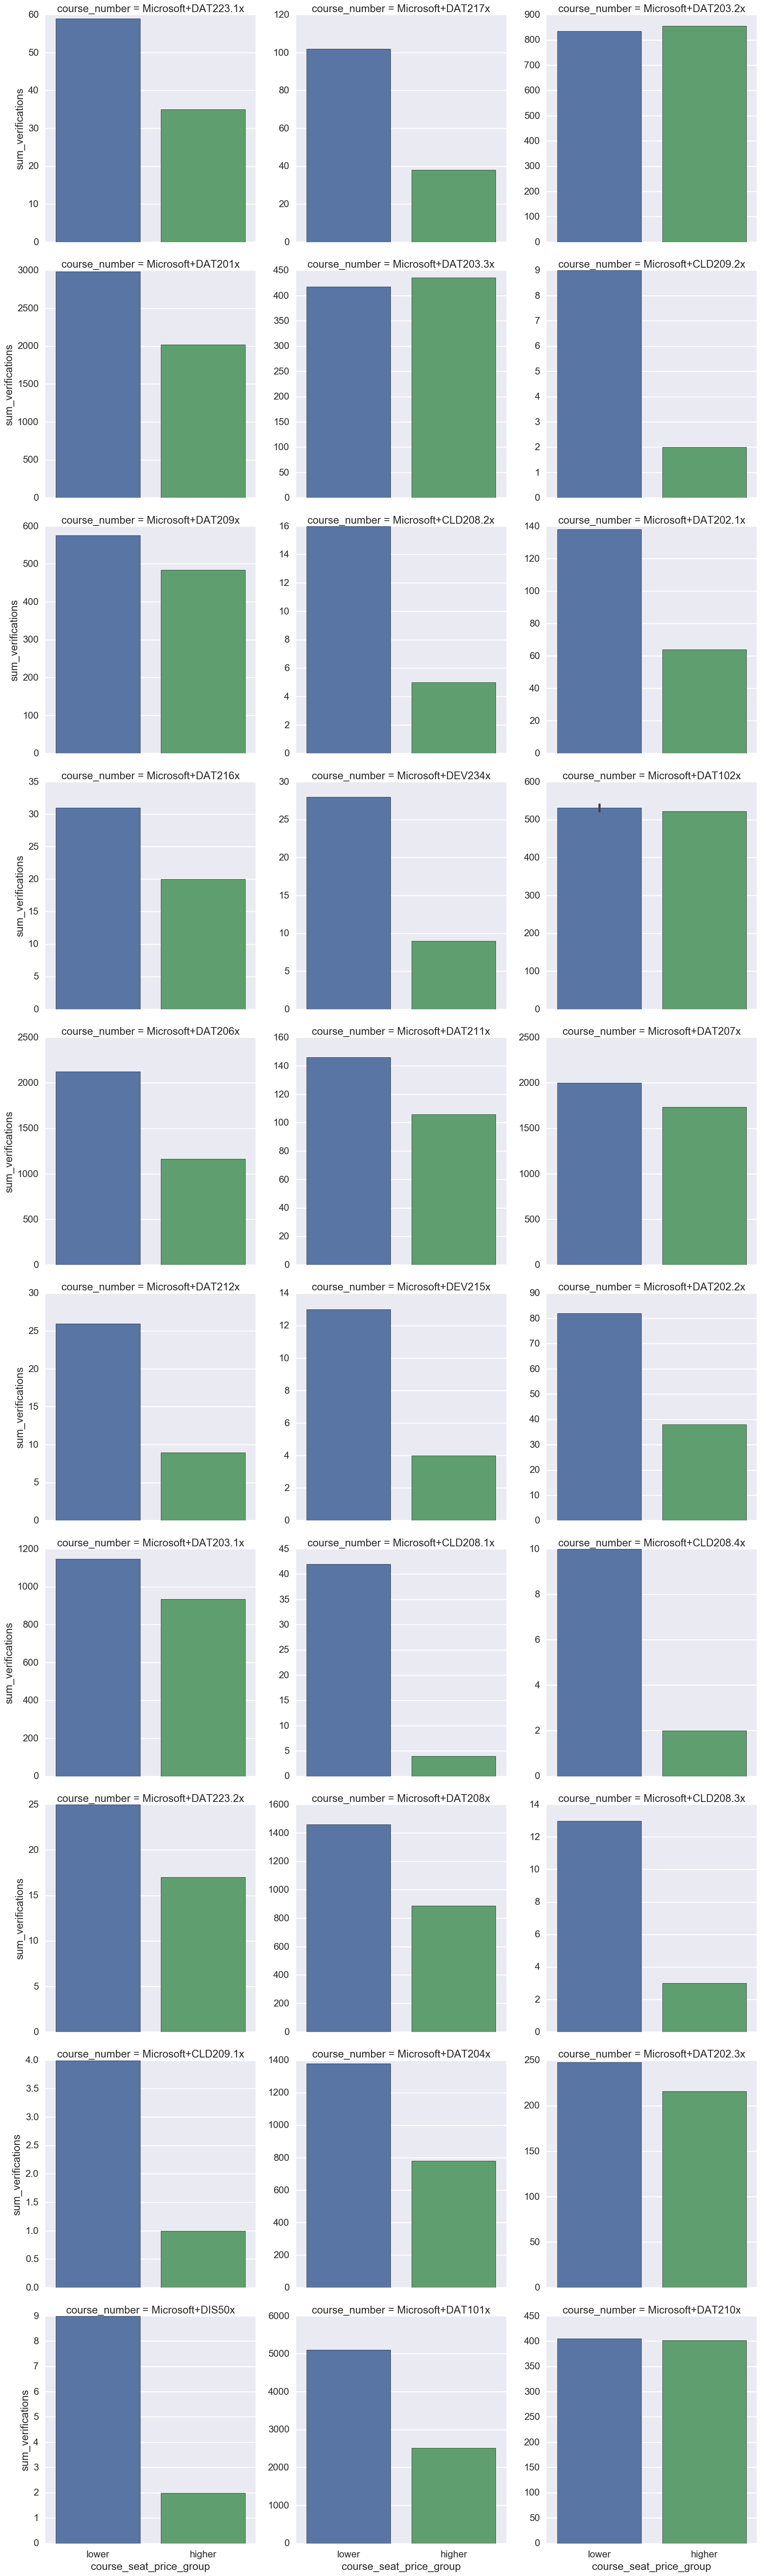





****************************************************************************************************


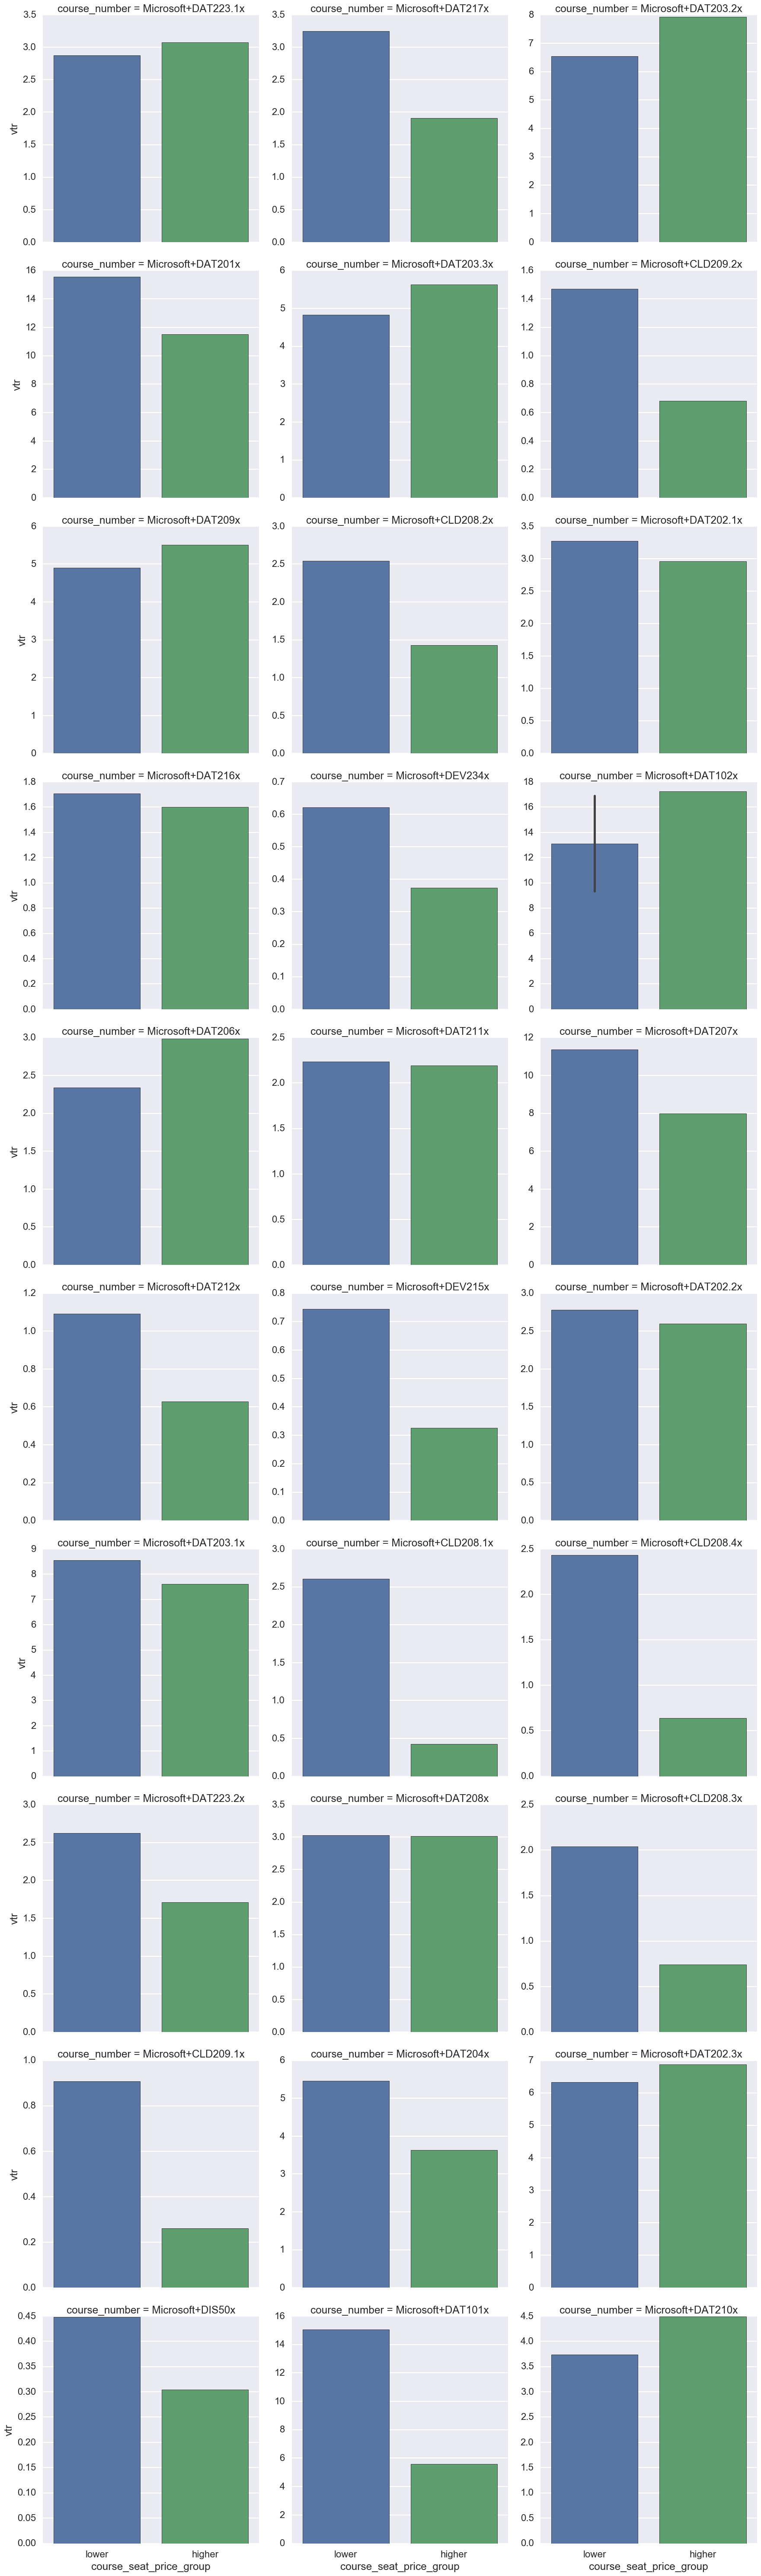





****************************************************************************************************


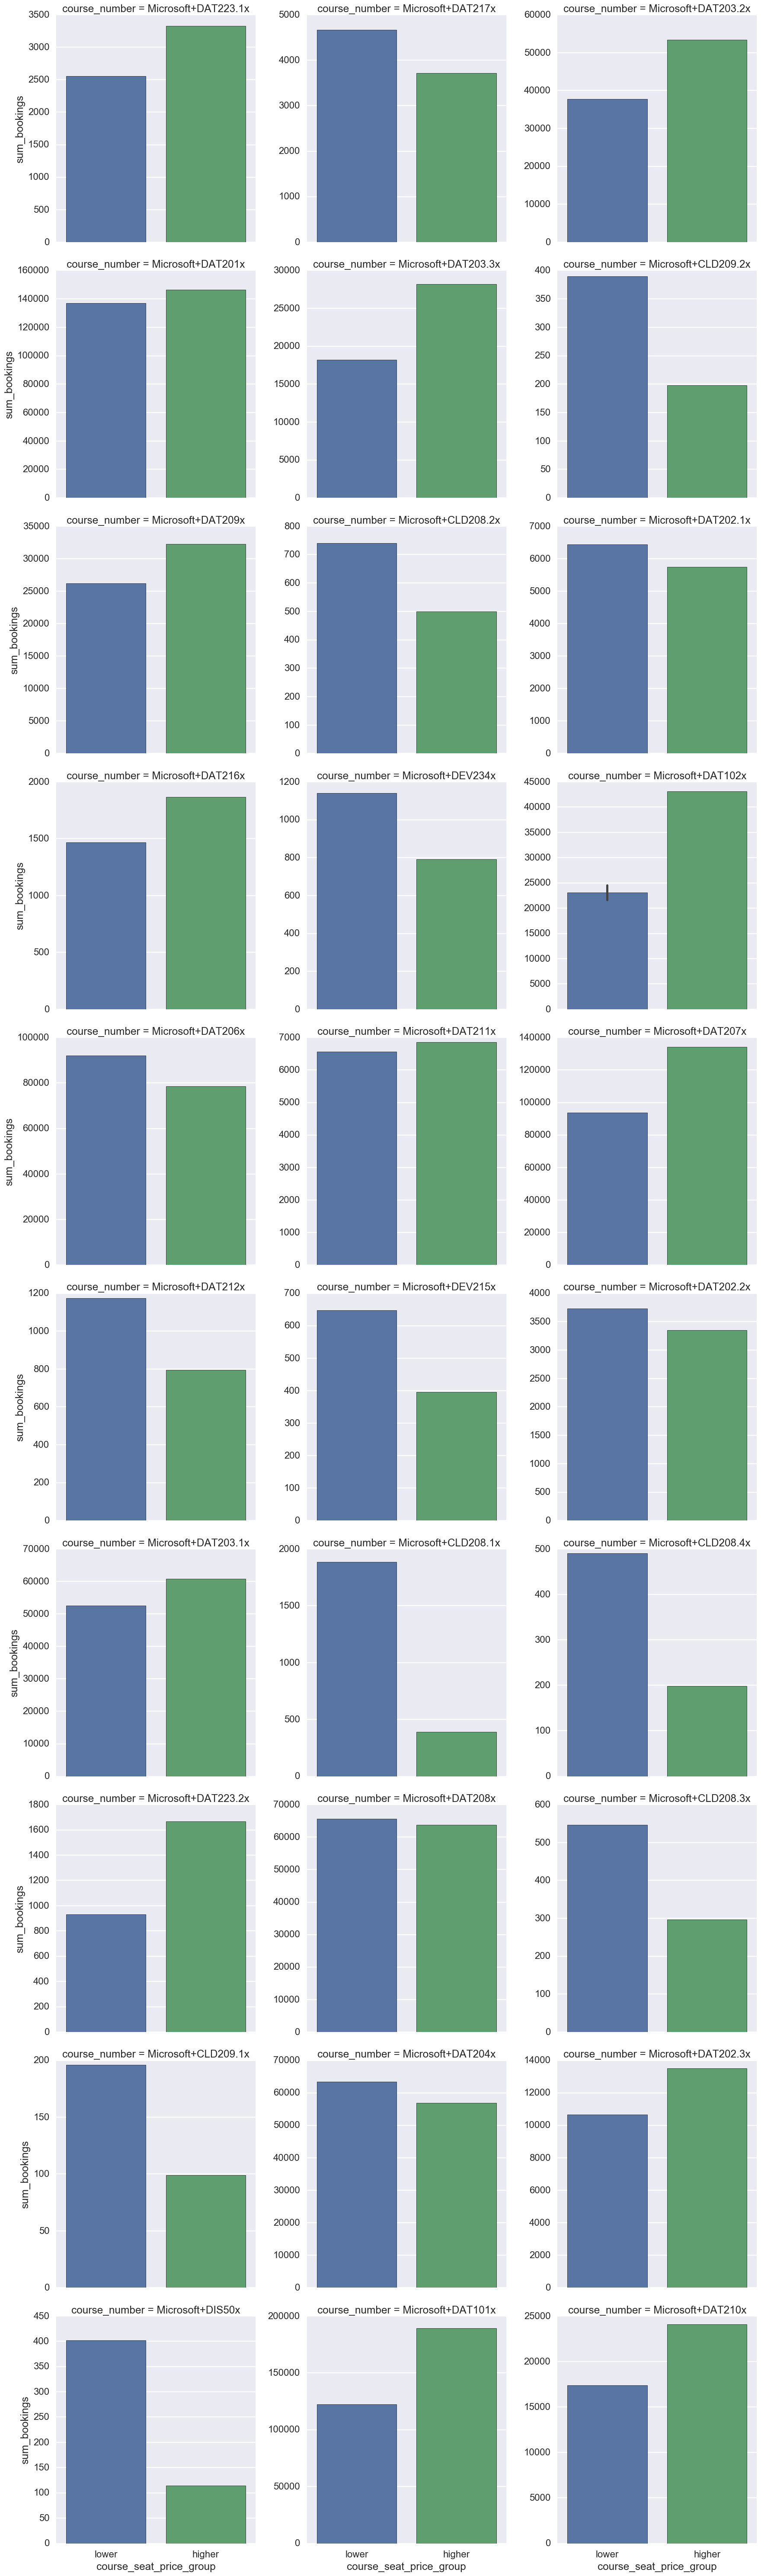

In [26]:
plot_stuff(df, x = 'course_seat_price_group', y = 'sum_enrolls', row = 'course_number')
plot_stuff(df, x = 'course_seat_price_group', y = 'sum_verifications', row = 'course_number')
plot_stuff(df, x = 'course_seat_price_group', y = 'vtr', row = 'course_number')
plot_stuff(df, x = 'course_seat_price_group', y = 'sum_bookings', row = 'course_number')

## Program Analysis





****************************************************************************************************


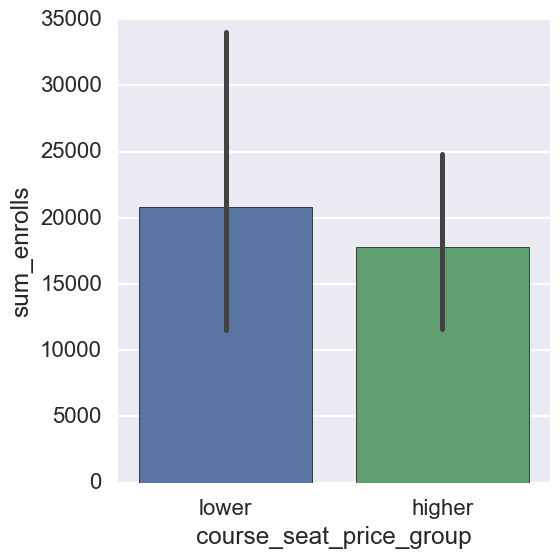





****************************************************************************************************


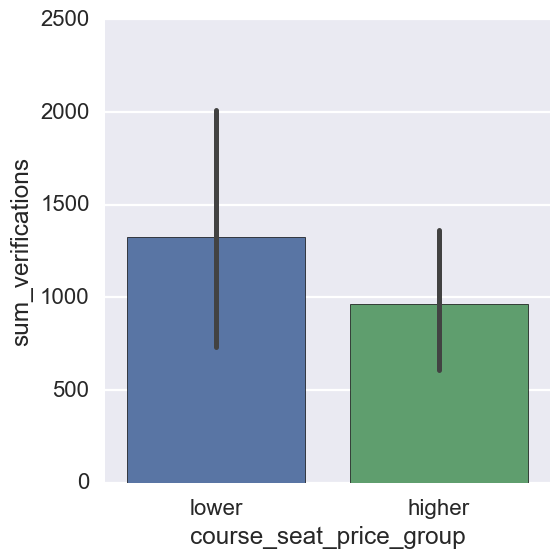





****************************************************************************************************


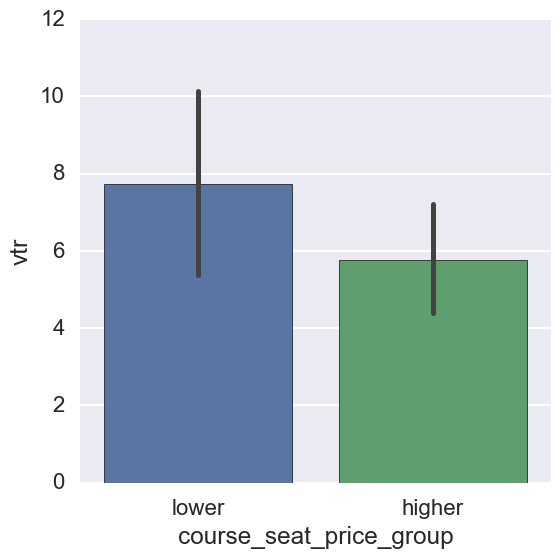





****************************************************************************************************


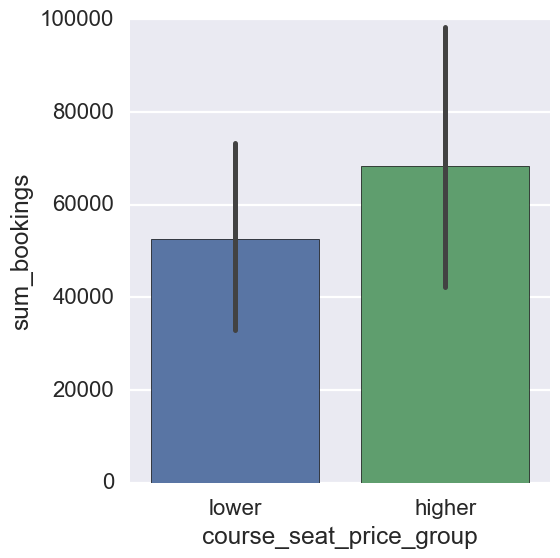

In [27]:
plot_stuff(df[df['fake_program']=='program'], x = 'course_seat_price_group', y = 'sum_enrolls')
plot_stuff(df[df['fake_program']=='program'], x = 'course_seat_price_group', y = 'sum_verifications')
plot_stuff(df[df['fake_program']=='program'], x = 'course_seat_price_group', y = 'vtr')
plot_stuff(df[df['fake_program']=='program'], x = 'course_seat_price_group', y = 'sum_bookings')

In [28]:
df.groupby(['course_program_number','course_seat_price_group']).mean().reset_index().set_index('course_program_number').loc['1']

,course_seat_price_group,sum_enrolls,sum_enrolls_vtr,sum_verifications,cnt_discounted_verifications,vtr,undiscounted_vtr,sum_bookings,expected_value
course_program_number,,,,,,,,,
1,higher,45102.0,45101.0,2519.0,393.0,5.585242,4.755301,189415.75,5.529390
1,lower,33929.0,33928.0,5104.0,0.0,15.043622,15.043622,122451.75,3.760905


In [29]:
agg_df = pd.DataFrame()
agg_df = df.groupby(['course_program_number','course_seat_price_group']).mean().reset_index().set_index('course_program_number')

In [ ]:
#agg_df.reset_index()#.loc[2][]

In [31]:
metric_list = ['sum_enrolls', 'sum_verifications', 'vtr', 'sum_bookings', 'undiscounted_vtr']
#index_list = [1,2,3,5,6,7,8,9]
index_list = ['1','2','3','5','6','7','8','9']

pct_diff_df = pd.DataFrame()
pct_diff_df['course_program_number'] = index_list

for metric in metric_list:
    diff_list = []
    for i in index_list:
        temp_df = agg_df.loc[i]
        lower = temp_df[temp_df['course_seat_price_group'] == 'lower'][metric].values[0]
        higher = temp_df[temp_df['course_seat_price_group'] == 'higher'][metric].values[0]
        val = (higher - lower)/lower
        diff_list.append(val)
    pct_diff_df['pct_diff_' + metric] = (diff_list)

pct_diff_df['pct_diff_vtr'] = pct_diff_df['pct_diff_vtr']*100.0
pct_diff_df['pct_diff_undiscounted_vtr'] = pct_diff_df['pct_diff_undiscounted_vtr']*100.0

In [32]:
pct_diff_df

,course_program_number,pct_diff_sum_enrolls,pct_diff_sum_verifications,pct_diff_vtr,pct_diff_sum_bookings,pct_diff_undiscounted_vtr
0,1,0.329305,-0.506466,-62.873023,0.546860,-68.389919
1,2,-0.082551,-0.322170,-26.109222,0.068418,-44.864756
2,3,-0.440312,-0.297238,-19.886614,0.144323,-36.313604
3,5,-0.307145,-0.412738,-21.630320,-0.064574,-43.346623
4,6,-0.085110,-0.184830,-10.906354,0.156276,-44.770402
5,7,-0.154834,0.025150,21.286119,0.416638,-29.675245
6,8,-0.214896,-0.096840,15.782477,0.294492,-29.868275
7,9,-0.176760,-0.066502,9.615333,0.371842,-31.935703


In [44]:
df['grouping'] = np.where(df['course_program_number']<'3','first_course','subsequent_courses')

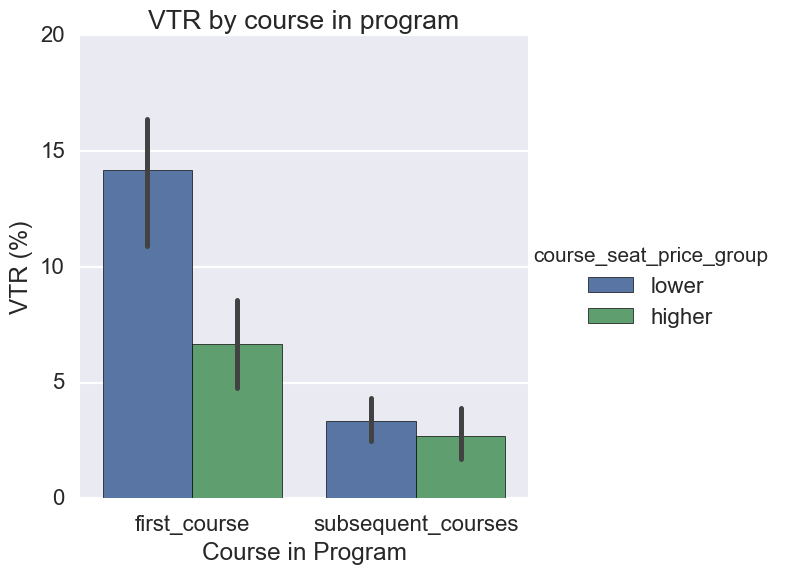

In [45]:
ax.set(title = '$/Enroll by course in program',
      xlabel = 'Course in Program',
      ylabel = '$/Enroll',
      ylim = (0, 20))

ax = sns.factorplot(
    data = df,
    x = 'grouping',
    y = 'undiscounted_vtr',
    kind = 'bar',
    size = 6,
    order = ['first_course', 'subsequent_courses'],
    hue = 'course_seat_price_group',
    hue_order = ['lower', 'higher']
)

ax.set(title = 'VTR by course in program',
      xlabel = 'Course in Program',
      ylabel = 'VTR (%)',
      ylim = (0, 20))

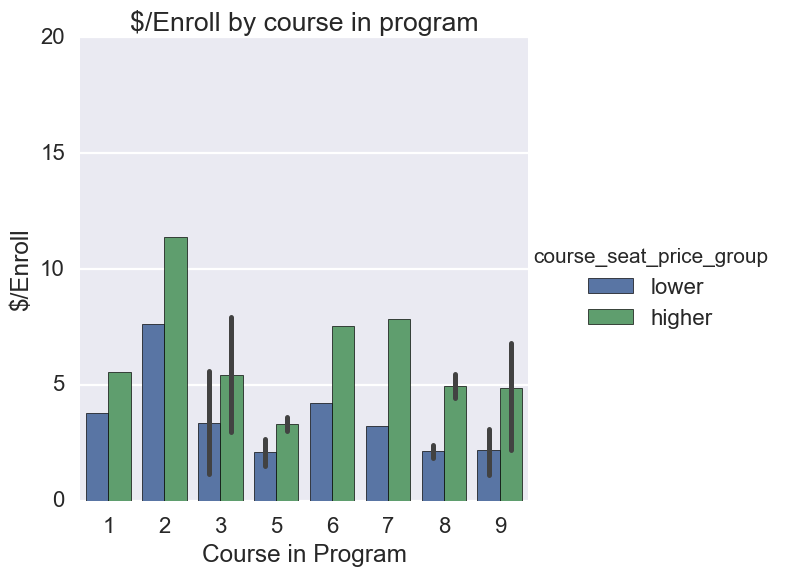

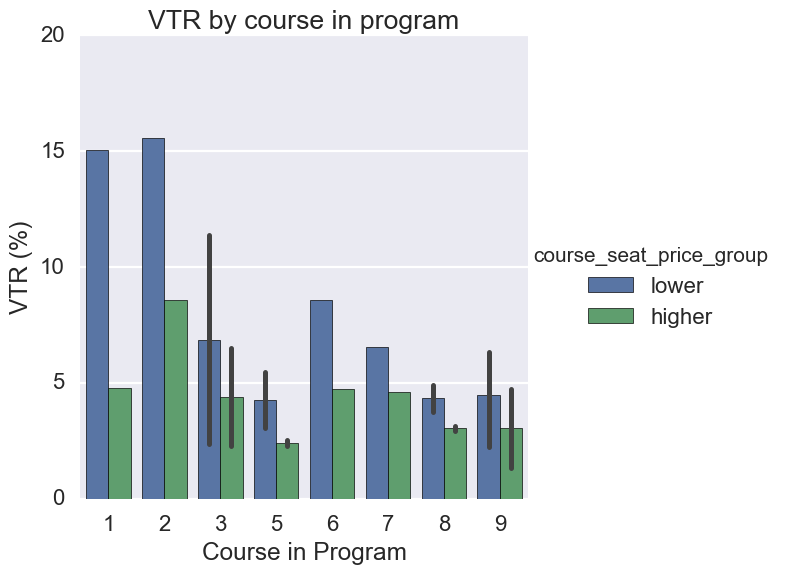

In [34]:
# sns.factorplot(
#     data = df,
#     x = 'course_program_number',
#     y = 'sum_enrolls',
#     kind = 'bar',
#     size = 6,
#     order = ['1','2','3','5','6','7','8','9'],
#     hue = 'course_seat_price_group'
# )

# sns.factorplot(
#     data = df,
#     x = 'course_program_number',
#     y = 'sum_verifications',
#     kind = 'bar',
#     size = 6,
#     order = ['1','2','3','5','6','7','8','9'],
#     hue = 'course_seat_price_group'
# )

ax = sns.factorplot(
    data = df,
    x = 'course_program_number',
    y = 'expected_value',
    kind = 'bar',
    size = 6,
    order = ['1','2','3','5','6','7','8','9'],
    hue = 'course_seat_price_group',
    hue_order = ['lower', 'higher']
)

ax.set(title = '$/Enroll by course in program',
      xlabel = 'Course in Program',
      ylabel = '$/Enroll',
      ylim = (0, 20))

ax = sns.factorplot(
    data = df,
    x = 'course_program_number',
    y = 'undiscounted_vtr',
    kind = 'bar',
    size = 6,
    order = ['1','2','3','5','6','7','8','9'],
    hue = 'course_seat_price_group',
    hue_order = ['lower', 'higher']
)

ax.set(title = 'VTR by course in program',
      xlabel = 'Course in Program',
      ylabel = 'VTR (%)',
      ylim = (0, 20))

# sns.factorplot(
#     data = df,
#     x = 'course_program_number',
#     y = 'sum_bookings',
#     kind = 'bar',
#     size = 6,
#     order = ['1','2','3','5','6','7','8','9'],
#     hue = 'course_seat_price_group'
# )

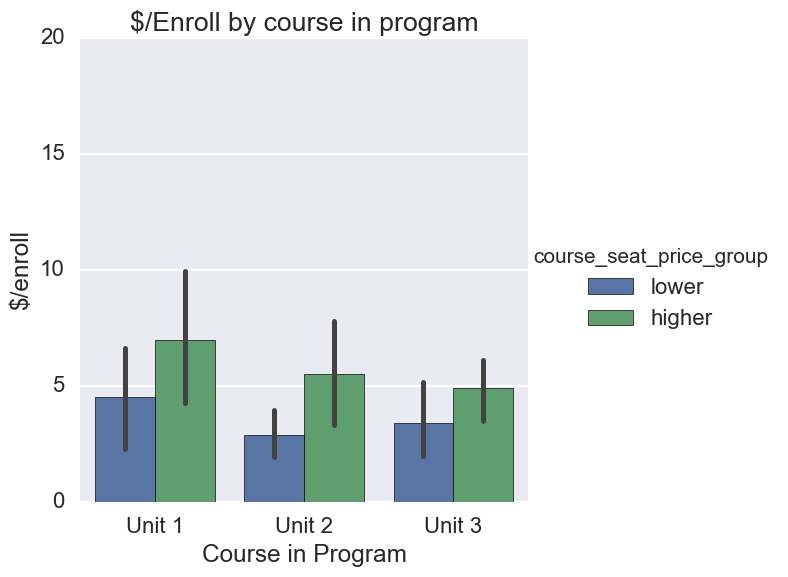

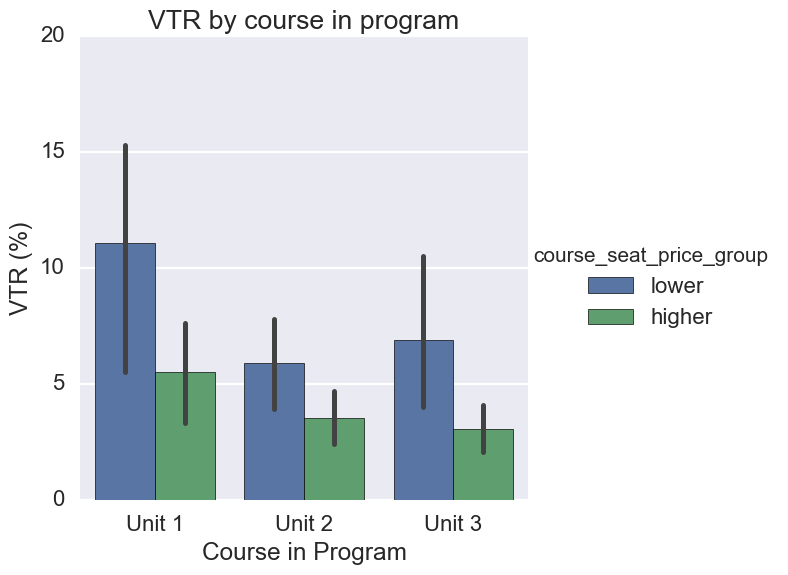

In [35]:
# sns.factorplot(
#     data = df,
#     x = 'course_program_number',
#     y = 'sum_enrolls',
#     kind = 'bar',
#     size = 6,
#     order = ['1','2','3','5','6','7','8','9'],
#     hue = 'course_seat_price_group'
# )

# sns.factorplot(
#     data = df,
#     x = 'course_program_number',
#     y = 'sum_verifications',
#     kind = 'bar',
#     size = 6,
#     order = ['1','2','3','5','6','7','8','9'],
#     hue = 'course_seat_price_group'
# )

ax = sns.factorplot(
    data = df,
    x = 'ms_course_program_group',
    y = 'expected_value',
    kind = 'bar',
    size = 6,
    hue = 'course_seat_price_group',
    hue_order = ['lower', 'higher'],
    order = ['Unit 1', 'Unit 2', 'Unit 3']
)

ax.set(title = '$/Enroll by course in program',
      xlabel = 'Course in Program',
      ylabel = '$/enroll',
      ylim = (0, 20))

ax = sns.factorplot(
    data = df,
    x = 'ms_course_program_group',
    y = 'undiscounted_vtr',
    kind = 'bar',
    size = 6,
    hue = 'course_seat_price_group',
    hue_order = ['lower', 'higher'],
    order = ['Unit 1', 'Unit 2', 'Unit 3']
)

ax.set(title = 'VTR by course in program',
      xlabel = 'Course in Program',
      ylabel = 'VTR (%)',
      ylim = (0, 20))

# sns.factorplot(
#     data = df,
#     x = 'course_program_number',
#     y = 'sum_bookings',
#     kind = 'bar',
#     size = 6,
#     order = ['1','2','3','5','6','7','8','9'],
#     hue = 'course_seat_price_group'
# )

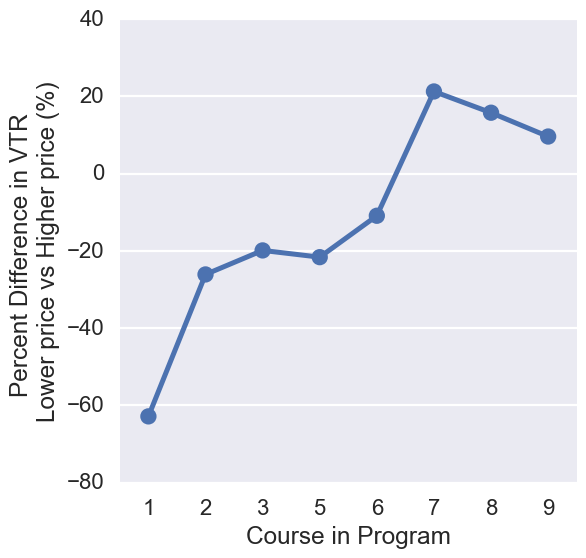

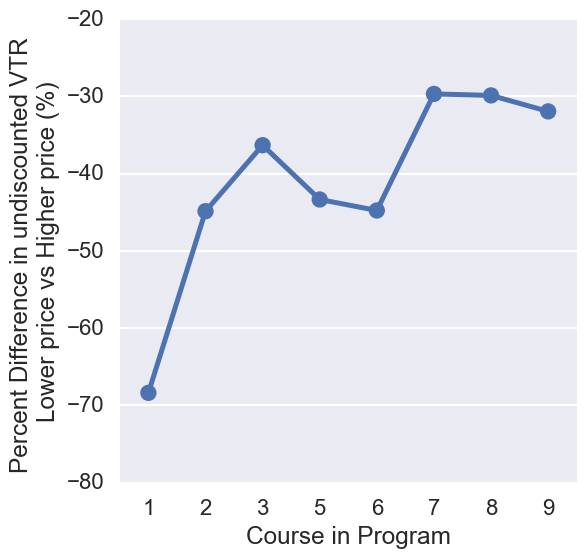

In [36]:
# sns.factorplot(
#     data = pct_diff_df,
#     x = 'course_program_number',
#     y = 'pct_diff_sum_enrolls',
#     kind = 'point',
#     size = 6,
#     order = index_list
# )

# sns.factorplot(
#     data = pct_diff_df,
#     x = 'course_program_number',
#     y = 'pct_diff_sum_verifications',
#     kind = 'point',
#     size = 6,
#     order = index_list
# )

ax = sns.factorplot(
    data = pct_diff_df,
    x = 'course_program_number',
    y = 'pct_diff_vtr',
    kind = 'point',
    size = 6,
    order = index_list
)
ax.set(ylabel = 'Percent Difference in VTR \nLower price vs Higher price (%)',
      xlabel = 'Course in Program')

ax = sns.factorplot(
    data = pct_diff_df,
    x = 'course_program_number',
    y = 'pct_diff_undiscounted_vtr',
    kind = 'point',
    size = 6,
    order = index_list
)
ax.set(ylabel = 'Percent Difference in undiscounted VTR \nLower price vs Higher price (%)',
      xlabel = 'Course in Program')